# Project Final Report -- Group 14

Group Members: Hsin-Jung Yu, Yuhan Cui, Ho Huang

1. <a href='#intro'><b>Introduction</b></a><br>
2. <a href='#main_objective'><b>Main Objective</b></a><br>
3. <a href='#description'><b>Data Description</b></a> <br>
4. <a href='#data_process'><b>Data Processing</b></a>
    * <a href='#function'>Defining Functions dealing with variables</a> <br>
        - <a href='#attacktype'>Combining attacktype variables</a> <br>
        - <a href='#targettype'>Combining targettype variables</a> <br>
        - <a href='#target'>Combining target variables</a> <br>
        - <a href='#corp'>Combining corporate entity variables</a> <br>
        - <a href='#natlty'>Combining nationality variables</a> <br>
        - <a href='#perpetrator'>Combining group name / claim responsibility variables</a> <br>
        - <a href='#weaptype'>Combining weapontype variables</a> <br>
        - <a href='#casualities'>Combining casualities variables</a> <br>
    * <a href='#gdp'>Merging GDP data</a> <br>
    * <a href='#df_all'>Create new dataframe for further analysis</a> <br><br>
5. <a href='#data_analysis'><b>Data Analysis with visualizations</b></a> <br>
    * <a href='#world_us'>Look at attacks happened in the World vs USA over years</a> <br>
        - <a href='#cau_us'>Look at causaltities in the World vs USA over years</a> <br>
        - <a href='#gdp_us'>Attack frequency among areas with different income levels</a> <br>
        - <a href='#us_citizen'>The distribution of attacks causing 10 or more death of U.S citizens</a> <br>
    * <a href='#state_us'>Look at attacks happened in US domestic by casualities over years</a> <br>
        - <a href='#state_att'>States by the attack frequency and caused causualties</a> <br>
    * <a href='#5_gname'>The evolution of top 5 terrorist goups cause the most casualties in U.S</a> <br>
        - <a href='#gname_trend'>The trend of the top 5 notorious groups over years</a> <br>
        - <a href='#gname_type'>The attacktype/weapontype/targettype by top 5 notorious groups</a> <br>
    * <a href='#motivation'>Motivation of terror groups</a> <br><br>
6. <a href='#model'><b>Predictive Model</b></a> <br>
    * <a href='#wraggling'>Wrangle data (create dummies/reduce levels) for modeling purpose </a> <br>
    * <a href='#sklearn'>Sklearn Model</a> <br>
        - <a href='#rfe'>RFE</a> <br>
        - <a href='#prediction'>Prediction</a> <br>
        - <a href='#roc'>ROC Curve</a> <br>
        - <a href='#coef'>Coefficient</a> <br>
    * <a href='#logit'>Logit Model</a> <br><br>
7. <a href='#conclusion'><b>Conclusion</b></a> <br>    
    

## Introduction <a id='intro'></a>

Terror attacks recently have been a serious issue. Each country is dedicated to preventing terrorism and also aware of any possible attacks. With the development of scientific and technological progress, there are a variety of ways of terror attacks occurring. In response to this situation, the government from all over the world are urging to use new intelligence efforts to protect the nation's borders, defend against threats, minimize infrastructure vulnerabilities, and improve emergency responses. In order to understand how active and the pattern of the terror attacks, we want to analyze the data from the Global Terrorism Database(GTD).

## Main Objective <a id='main_objective'></a>

Our main goal is by analyzing the historical data as well as using predictive models, we could provide the federal officials possible factors that cause terroriosts to successfully launched the attacks. In addition, providing suggestions aimed to enhance the federal officials' abilities of identifying, disrupting, and preventing terrorist attacks.<br>

## Data Description <a id='description'></a>

The Global Terrorism Database (GTD) is maintained by the National Consortium for the Study of Terrorism (START) at the University of Maryland, College Park, and it contains:
* terrorisms records from <font color=red>1970</font> to <font color=red>2017</font>, including systematic data on domestic as well as transnational and international terrorist incidents that have occurred during this time period.
<br><br>
* <font color=blue>182,000</font> rows and <font color=blue>135</font> columns in the data set, where each row indicates an incident of terrorism. 
<br><br>
* a wide range of entries(columns) related to the terrorist attack, including :
    - GTD ID and Date
    - Incident Information
    - Location(Region, Country) 
    - Attack Type : General method of attack, it consists of 9 categories. For example, Assassination , Hijacking, etc.
    - Weapon Type : The weapon types are recorded for each incident. 
    - Victim Information(Targettype/Target): 
        - Targettype: General type of target/victim, it contains 22 categories. For example, it could be Business, Government, etc.<br>
        - Target: This is the specific person, building, installation, etc., that was targeted and/or victimized and is a part of the entity named above. For example, if the U.S. Embassy in Country X was attacked the “Name of Entity” would be “United States Department of State”. <br>
    - Perpetrator Information(Group name/ Claim):
        - Gname : The group name is the name of the group that carried out the attack.
        - Claim : It is used to indicate whether a group or person(s) claimed responsibility for the attack. If marked “Yes”, it indicates that a person or a group did in fact claim responsibility.
    - Casualties(nkill/nkillus/nkillter/nwound/nwoundus/nwoundte): This category includes number of killed or wound in global, U.S
    - Consequences
* GTD Data aquired by downloading from _https://www.kaggle.com/START-UMD/gtd_

## Data Processing <a id='data_process'></a>

  As we know, to successfully launch terror attacks contains several important points. We need to focus on what terrorist groups that planned which kind of attack types, what the target type and targets might be. What kind of weapon types they proned to use, and what number of casualities the attack causes. <br>

Before data processing, we found out that the data of 1993 is missing, therefore we download the data from the GTD offical website and concat them together.<br>
Now, we can see that we have too many variables in the original dataframe, some of them contains a lot of null values.<br>
Most of the variables are appendices of some main variables we mentioned in the data description. (For example, weapsubtypetxt_1 is the appendix of weaptype1_txt)<br>
Therefore, we process the data in the following steps  for each variable:<br>
1. First, we decided to join all the appendix into a column with '|' as the separater. This could make our dataframe more readable.<br>
2. Second, since one of our main goal is to provided a model that could help the government to prevent the terror attacks by predicting the possibility of successfully launching attacks. We decided to calculate the binary variables of each variables. For example, whether the attack used multiple weapons or not. <br>
3. Third, we decided to count the variables, for example how many weapons used in the attack.<br>
4. After dealing with variables, we think of maybe GDP or different income groups in a country will led to the frequency of terror attacks. Hence, we decided to merged the GDP data from World Bank Group. __(https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?page=)__<br>
5. At last, we take out unnecessary variables and provide a tidy dataframe.<br>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [10]:
path="C:/Users/Yuhan/Documents/BUDT758X/project/dataset/"
df = pd.read_excel(path + 'globalterrorismdb_0718dist.xlsx', delimiter = ',', encoding= 'latin-1')

In [11]:
#Load 1993 dataset
df_1993=pd.read_excel(path + 'gtd1993_0718dist.xlsx')

In [12]:
#Concatenate the 2 parts of data together
df = pd.concat([df,df_1993],axis=0, ignore_index=True)

In [13]:
#Sort the dataframe by year
df = df.sort_values(['iyear']).reset_index(drop = True)

In [17]:
pd.set_option('display.max_columns' ,150)

In [18]:
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197007270001   1970       7    27        NaN         0        NaT      217   
2  197007270002   1970       7    26        NaN         0        NaT      217   
3  197007270003   1970       7    26        NaN         0        NaT      217   
4  197007270004   1970       7    27        NaN         0        NaT      217   

          country_txt  region                   region_txt   provstate  \
0  Dominican Republic       2  Central America & Caribbean         NaN   
1       United States       1                North America    New York   
2       United States       1                North America   Wisconsin   
3       United States       1                North America   Wisconsin   
4       United States       1                North America  California   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1  New York City  40.697132  -73.931351          1.0         0      NaN   
2         Sparta  43.939135  -90.820369          1.0         0      NaN   
3         Sparta  43.939135  -90.820369          1.0         0      NaN   
4  San Francisco  37.755363 -122.443352          1.0         0      NaN   

                                             summary  crit1  crit2  crit3  \
0                                                NaN      1      1      1   
1                                                NaN      1      1      1   
2                                                NaN      1      1      1   
3                                                NaN      1      1      1   
4  7/27/1970: In a series of related attack, unkn...      1      1      1   

   doubtterr  alternative alternative_txt  multiple  success  suicide  \
0        0.0          NaN             NaN       0.0      1.0        0   
1        0.0          NaN             NaN       0.0      1.0        0   
2        0.0          NaN             NaN       0.0      1.0        0   
3        0.0          NaN             NaN       0.0      1.0        0   
4        0.0          NaN             NaN       1.0      1.0        0   

   attacktype1    attacktype1_txt  attacktype2 attacktype2_txt  attacktype3  \
0            1      Assassination          NaN             NaN          NaN   
1            3  Bombing/Explosion          NaN             NaN          NaN   
2            3  Bombing/Explosion          NaN             NaN          NaN   
3            3  Bombing/Explosion          NaN             NaN          NaN   
4            3  Bombing/Explosion          NaN             NaN          NaN   

  attacktype3_txt  targtype1                targtype1_txt  targsubtype1  \
0             NaN         14  Private Citizens & Property          68.0   
1             NaN          1                     Business           3.0   
2             NaN         21                    Utilities         107.0   
3             NaN         16            Telecommunication          90.0   
4             NaN          4                     Military          27.0   

                                targsubtype1_txt                corp1  \
0                                 Named Civilian                  NaN   
1                                  Bank/Commerce      Bank of America   
2                                    Electricity                  NaN   
3                            Telephone/Telegraph                  NaN   
4  Military Barracks/Base/Headquarters/Checkpost  Armed Forces Police   

                                           target1  natlty1  \
0                                     Julio Guzman     58.0   
1                 Bank of America, wall st. office    217.0   
2                        electric power substation    217.0   
3                               telephone exchange    217.0   
4  Armed Forces Police Headquarters, San Fr

### 1. Define Functions <a id='function'></a>

In [2]:
# Define a function to check whether there's same value in different variables, if same assign null
def sameCheck(df, same_list):
    for j in range(len(same_list)):
        for i in range(len(df)):
            if j < len(same_list)-1:
                if df[same_list[j]].iloc[i] == df[same_list[j+1]].iloc[i]:
                    df[same_list[j+1]].iloc[i] = np.nan
            else:
                if df[same_list[j]].iloc[i] == df[same_list[0]].iloc[i]:
                    df[same_list[j]].iloc[i] = np.nan

In [11]:
#Define a function to create new binary variable
def binaryVariable(df, var_list, name):
    num = len(var_list)
    if num <= 3:
        df[name] = np.where(df[var_list[1]].notnull() == True, 1, np.where(df[var_list[1]].isnull() & df[var_list[2]].notnull() == True, 1, 0))
    if num > 3:
        df[name] = np.where(df[var_list[1]].notnull() == True, 1, 
                                 np.where(df[var_list[1]].isnull() & df[var_list[2]].notnull() == True, 1, 
                                          np.where(df[var_list[1]].isnull() & df[var_list[3]].notnull() == True, 1,0)))


In [12]:
#Define a function to count the variable
def countVariable(df, var_list, name):
    num = len(var_list)
    if num <= 3:
        df[name] = np.where(df[var_list[0]].notnull() == True, 1, 0) + np.where(df[var_list[1]].notnull() == True, 1, 0) + np.where(df[var_list[2]].notnull() == True, 1, 0)
    if num > 3:
        df[name] = np.where(df[var_list[0]].notnull() == True, 1, 0) + np.where(df[var_list[1]].notnull() == True, 1, 0) + np.where(df[var_list[2]].notnull() == True, 1, 0) + np.where(df[var_list[3]].notnull() == True, 1, 0)
    

### 2. Deal with Attacktype, Targettype, Target, Corp, Nationaliy, Perpetrator, WeaponType and Casualties Variables

#### a. Deal with AttackType Variables <a id='attacktype'></a>

In [13]:
# Define the variables used
attacktype_list = ['attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt']
attack_list = ['attacktype1','attacktype2','attacktype3']

In [14]:
# Filter out the attacktype from the original dataframe
df_attack = df.filter(regex = '\w*attacktype[1-3]_txt')
df_attack.head()

attacktype1_txt attacktype2_txt attacktype3_txt
0                   Assassination             NaN             NaN
1                   Assassination             NaN             NaN
2               Bombing/Explosion             NaN             NaN
3  Facility/Infrastructure Attack             NaN             NaN
4                   Armed Assault             NaN             NaN

In [16]:
# Check is there same value in different attacktype, if same, we'll process the same value to null.
pd.options.mode.chained_assignment = None
sameCheck(df_attack, attacktype_list)

In [18]:
# Create new binary variable 'multiattacktype' for further modeling.
binaryVariable(df_attack, attacktype_list, 'multiattacktype' )
df_attack['multiattacktype'].value_counts()

0    176102
1      6336
Name: multiattacktype, dtype: int64

In [19]:
# Create new numeric count variable 'attacktype_count'.
countVariable(df_attack, attacktype_list, 'attacktype_count')
df_attack['attacktype_count'].value_counts()

1    176102
2      5934
3       402
Name: attacktype_count, dtype: int64

In [20]:
# Combine attacktype into 1 column with separater '|'
df_attack['attacktype'] = df_attack[df_attack.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [21]:
df_attack.head(25)

attacktype1_txt attacktype2_txt attacktype3_txt  \
0                    Assassination             NaN             NaN   
1                    Assassination             NaN             NaN   
2                Bombing/Explosion             NaN             NaN   
3   Facility/Infrastructure Attack             NaN             NaN   
4                    Armed Assault             NaN             NaN   
5                    Assassination             NaN             NaN   
6                Bombing/Explosion             NaN             NaN   
7   Facility/Infrastructure Attack             NaN             NaN   
8      Hostage Taking (Kidnapping)             NaN             NaN   
9   Facility/Infrastructure Attack             NaN             NaN   
10  Facility/Infrastructure Attack             NaN             NaN   
11                       Hijacking             NaN             NaN   
12  Facility/Infrastructure Attack             NaN             NaN   
13               Bombing/Explosion             NaN             NaN   
14                         Unknown             NaN             NaN   
15               Bombing/Explosion             NaN             NaN   
16  Facility/Infrastructure Attack             NaN             NaN   
17               Bombing/Explosion             NaN             NaN   
18               Bombing/Explosion             NaN             NaN   
19               Bombing/Explosion             NaN             NaN   
20  Facility/Infrastructure Attack             NaN             NaN   
21               Bombing/Explosion             NaN             NaN   
22  Facility/Infrastructure Attack   Armed Assault             NaN   
23                   Assassination             NaN             NaN   
24               Bombing/Explosion             NaN             NaN   

    multiattacktype  attacktype_count  \
0                 0                 1   
1                 0                 1   
2                 0                 1   
3                 0                 1   
4                 0                 1   
5                 0                 1   
6                 0                 1   
7                 0                 1   
8                 0                 1   
9                 0                 1   
10                0                 1   
11                0                 1   
12                0                 1   
13                0                 1   
14                0                 1   
15                0                 1   
16                0                 1   
17                0                 1   
18                0                 1   
19                0                 1   
20                0                 1   
21                0                 1   
22                1                 2   
23                0                 1   
24                0                 1   

                                      attacktype  
0                                  Assassination  
1                                  Assassination  
2                              Bombing/Explosion  
3                 Facility/Infrastructure Attack  
4                                  Armed Assault  
5                                  Assassination  
6                              Bombing/Explosion  
7                 Facility/Infrastructure Attack  
8                    Hostage Taking (Kidnapping)  
9                 Facility/Infrastructure Attack  
10                Facility/Infrastructure Attack  
11                                     Hijacking  
12                Facility/Infrastructure Attack  
13                             Bombing/Explosion  
14                                       Unknown  
15                             Bombing/Explosion  
16                Facility/Infrastructure Attack  
17                             Bombing/Explosion  
18                             Bombing/Explosion  
19                             Bombing/Explosion  
20                Facility/Infrastructure Attack  
21       

In [174]:
# Take out the processed column "attacktype".
dfatt_new = df_attack.iloc[:,-3:]
dfatt_new.head()

multiattacktype  attacktype_count                      attacktype
0                0                 1                   Assassination
1                0                 1                   Assassination
2                0                 1               Bombing/Explosion
3                0                 1  Facility/Infrastructure Attack
4                0                 1                   Armed Assault

####  b.Targettype and Targetsubtype Variables <a id='targettype'></a>

In [24]:
targettypetxt_list = ["targtype1_txt", 'targtype2_txt', "targtype3_txt"]
targetsubtypetxt_list = ['targsubtype1_txt', 'targsubtype2_txt', 'targsubtype3_txt']
targtype_list = ['targtype1','targtype2','targtype3']
targsubtype_list = ['targsubtype1','targsubtype2','targsubtype3']

In [25]:
dft = df.filter(regex = 'targ\w*type').drop(targtype_list + targsubtype_list, axis = 1)
dft.head()

targtype1_txt  \
0  Private Citizens & Property   
1          Journalists & Media   
2      Government (Diplomatic)   
3      Government (Diplomatic)   
4                       Police   

                                  targsubtype1_txt targtype2_txt  \
0                                   Named Civilian           NaN   
1                  Radio Journalist/Staff/Facility           NaN   
2                                Embassy/Consulate           NaN   
3                                Embassy/Consulate           NaN   
4  Police Building (headquarters, station, school)           NaN   

  targsubtype2_txt targtype3_txt targsubtype3_txt  
0              NaN           NaN              NaN  
1              NaN           NaN              NaN  
2              NaN           NaN              NaN  
3              NaN           NaN              NaN  
4              NaN           NaN              NaN

In [26]:
pd.options.mode.chained_assignment = None
# Check is there same value in different targettype, if same, we'll process the same value to null.
sameCheck(dft,targettypetxt_list)
# Check is there same value in different targetsubtype, if same, we'll process the same value to null.
sameCheck(dft,targetsubtypetxt_list)

In [30]:
# Create new binary variable 'multitargtype' for further modeling.
binaryVariable(dft, targettypetxt_list, 'multitargtype')
dft['multitargtype'].value_counts()

0    173100
1      9338
Name: multitargtype, dtype: int64

In [31]:
# Create new numeric count variable 'targtype_count'.
countVariable(dft, targettypetxt_list, 'targtype_count')
dft['targtype_count'].value_counts()

1    173100
2      8695
3       643
Name: targtype_count, dtype: int64

In [32]:
# Create new binary variable 'multitargsubtype' for further modeling.
binaryVariable(dft, targetsubtypetxt_list, 'multitargsubtype')
dft['multitargsubtype'].value_counts()

0    172729
1      9709
Name: multitargsubtype, dtype: int64

In [33]:
# Create new numeric count variable 'targsubtype_count'.
countVariable(dft, targetsubtypetxt_list, 'targsubtype_count')
dft['targsubtype_count'].value_counts()

1    162052
0     10887
2      8766
3       733
Name: targsubtype_count, dtype: int64

In [34]:
# combine targettype and targetsubtype into 1 column
dft['targettype']=dft[dft.columns[0:6]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [35]:
dft.head()

targtype1_txt  \
0  Private Citizens & Property   
1          Journalists & Media   
2      Government (Diplomatic)   
3      Government (Diplomatic)   
4                       Police   

                                  targsubtype1_txt targtype2_txt  \
0                                   Named Civilian           NaN   
1                  Radio Journalist/Staff/Facility           NaN   
2                                Embassy/Consulate           NaN   
3                                Embassy/Consulate           NaN   
4  Police Building (headquarters, station, school)           NaN   

  targsubtype2_txt targtype3_txt targsubtype3_txt  multitargtype  \
0              NaN           NaN              NaN              0   
1              NaN           NaN              NaN              0   
2              NaN           NaN              NaN              0   
3              NaN           NaN              NaN              0   
4              NaN           NaN              NaN              0   

   targtype_count  multitargsubtype  targsubtype_count  \
0               1                 0                  1   
1               1                 0                  1   
2               1                 0                  1   
3               1                 0                  1   
4               1                 0                  1   

                                          targettype  
0         Private Citizens & Property|Named Civilian  
1  Journalists & Media|Radio Journalist/Staff/Fac...  
2          Government (Diplomatic)|Embassy/Consulate  
3          Government (Diplomatic)|Embassy/Consulate  
4  Police|Police Building (headquarters, station,...

In [176]:
# Take out the processed column "targettype".
dft_new = dft.iloc[:,-5:]
dft_new.head()

multitargtype  targtype_count  multitargsubtype  targsubtype_count  \
0              0               1                 0                  1   
1              0               1                 0                  1   
2              0               1                 0                  1   
3              0               1                 0                  1   
4              0               1                 0                  1   

                                          targettype  
0         Private Citizens & Property|Named Civilian  
1  Journalists & Media|Radio Journalist/Staff/Fac...  
2          Government (Diplomatic)|Embassy/Consulate  
3          Government (Diplomatic)|Embassy/Consulate  
4  Police|Police Building (headquarters, station,...

####  c. Target: detailed victim information <a id='target'></a>

In [38]:
target_list = ['target1', 'target2', 'target3']

In [39]:
target=df.filter(regex = 'target')
target.head()

target1 target2 target3
0               Julio Guzman     NaN     NaN
1                   Employee     NaN     NaN
2               U.S. Embassy     NaN     NaN
3             U.S. Consulate     NaN     NaN
4  Cairo Police Headquarters     NaN     NaN

In [40]:
pd.options.mode.chained_assignment = None
# Check is there same value in different targettype, if same, we'll process the same value to null.
sameCheck(target, target_list)

In [42]:
# Create new binary variable 'multitarget' for further modeling.
binaryVariable(target, target_list, 'multitarget')
target['multitarget'].value_counts()

0    172163
1     10275
Name: multitarget, dtype: int64

In [43]:
# Create new numeric count variable 'target_count'.
countVariable(target, target_list, 'target_count')
target['target_count'].value_counts()

1    171544
2      9267
3      1001
0       626
Name: target_count, dtype: int64

In [44]:
target.head()

target1 target2 target3  multitarget  target_count
0               Julio Guzman     NaN     NaN            0             1
1                   Employee     NaN     NaN            0             1
2               U.S. Embassy     NaN     NaN            0             1
3             U.S. Consulate     NaN     NaN            0             1
4  Cairo Police Headquarters     NaN     NaN            0             1

In [45]:
# combine different target into 1 column
target['target']=target[target.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [53]:
# Check whether it combine different columns
target['target'].iloc[100,]

'Police Car'

In [178]:
# Take out the processed column "target".
target_new = target.iloc[:,-3:]
target_new.head(10)

multitarget  target_count  \
0            0             1   
1            0             1   
2            0             1   
3            0             1   
4            0             1   
5            0             1   
6            0             1   
7            0             1   
8            0             1   
9            0             1   

                                              target  
0                                       Julio Guzman  
1                                           Employee  
2                                       U.S. Embassy  
3                                     U.S. Consulate  
4                          Cairo Police Headquarters  
5  Juan Maria de Lucah/Chief of Directorate of in...  
6                                    Edes Substation  
7  R.O.T.C. offices at University of Wisconsin, M...  
8                            Nadine Chaval, daughter  
9  Selective Service Headquarters in Madison Wisc...

#### d. Corp: the name of the target entity <a id='corp'></a>

In [56]:
corp_list = ['corp1', 'corp2', 'corp3']

In [57]:
corp = df.filter(regex = '\w*corp\w*')
corp.head()

corp1 corp2 corp3
0                      NaN   NaN   NaN
1         Voice of America   NaN   NaN
2                      NaN   NaN   NaN
3                      NaN   NaN   NaN
4  Cairo Police Department   NaN   NaN

In [58]:
pd.options.mode.chained_assignment = None
# Check is there same value in different corp, if same, we'll process the same value to null.
sameCheck(corp, corp_list)

In [61]:
# Create new binary variable 'multicorp' for further modeling.
binaryVariable(corp, corp_list, 'multicorp')
corp['multicorp'].value_counts()

0    173024
1      9414
Name: multicorp, dtype: int64

In [62]:
# Create new numeric count variable 'corp_count'.
countVariable(corp, corp_list, 'corp_count')
corp['corp_count'].value_counts()

1    130797
0     42397
2      8510
3       734
Name: corp_count, dtype: int64

In [63]:
# combine different corps into 1 column
corp['corp'] = corp[corp.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [64]:
corp.head()

corp1 corp2 corp3  multicorp  corp_count  \
0                      NaN   NaN   NaN          0           0   
1         Voice of America   NaN   NaN          0           1   
2                      NaN   NaN   NaN          0           0   
3                      NaN   NaN   NaN          0           0   
4  Cairo Police Department   NaN   NaN          0           1   

                      corp  
0                           
1         Voice of America  
2                           
3                           
4  Cairo Police Department

In [179]:
corp_new = corp.iloc[:,-3:]
corp_new.head()

multicorp  corp_count                     corp
0          0           0                         
1          0           1         Voice of America
2          0           0                         
3          0           0                         
4          0           1  Cairo Police Department

####  e. Nationality <a id='natlty'></a>

In [67]:
natlty_list = ['natlty1_txt','natlty2_txt', 'natlty3_txt']
nat_list = ['natlty1','natlty2','natlty3']

In [68]:
natlty = df.filter(regex = 'natlty[1-3]_txt')
natlty.head()

natlty1_txt natlty2_txt natlty3_txt
0  Dominican Republic         NaN         NaN
1       United States         NaN         NaN
2       United States         NaN         NaN
3       United States         NaN         NaN
4       United States         NaN         NaN

In [69]:
# combine different nationalities into 1 column
natlty['natlty'] = natlty[natlty.columns].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [182]:
# Take out the processed column "natlty".
natlty_new = natlty.iloc[:,-1]
natlty_new.head()

0    Dominican Republic
1         United States
2         United States
3         United States
4         United States
Name: natlty, dtype: object

#### f. Deal with Perpetrator(Group Name , claim) Information <a id='perpetrator'></a>

In [73]:
group_name = ['gname', 'gname2', 'gname3']
groupsub_name = ['gsubname', 'gsubname2','gsubname3']

In [74]:
gname = df.filter(regex = 'gname?')
gname.head()

gname gname2 gname3
0              MANO-D    NaN    NaN
1             Unknown    NaN    NaN
2             Unknown    NaN    NaN
3             Unknown    NaN    NaN
4  Black Nationalists    NaN    NaN

In [75]:
pd.options.mode.chained_assignment = None
# Check is there same value in different group, if same, we'll process the same value to null.
sameCheck(gname, group_name)

In [77]:
# Create new binary variable 'multigroup' for further modeling.
binaryVariable(gname, group_name, 'multigroup')
gname['multigroup'].value_counts()

0    180424
1      2014
Name: multigroup, dtype: int64

In [78]:
# Create new numeric count variable 'group_count'.
countVariable(gname, group_name, 'group_count')
gname['group_count'].value_counts()

1    180424
2      1690
3       324
Name: group_count, dtype: int64

In [152]:
#Take the variables we created
gname_new = gname.iloc[:,3:5]

In [79]:
claim_list = ['claimed','claimmode', 'claim2',
              'claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt']

In [141]:
#Modify as Claim
df_claim = df.filter(regex = '(claimed)|(claim[2-3])').fillna(0)
df_claim['total_claim']= df_claim['claimed'] + df_claim['claim2'] + df_claim['claim3']
df_claim_new = df_claim['total_claim']
df_claim_new.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: total_claim, dtype: float64

#### g. Weapon Information <a id='weaptype'></a>

In [81]:
weapontypetxt_list = ['weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt','weaptype4_txt']
weaponsubtypetxt_list = ['weapsubtype1_txt', 'weapsubtype2_txt', 'weapsubtype3_txt','weapsubtype4_txt']
weaptype_list = ['weaptype1', 'weapsubtype1','weaptype2','weapsubtype2','weaptype3','weapsubtype3', 'weaptype4','weapsubtype4']

In [82]:
weapon = df.filter(regex = 'weap\w*type[1-4]_txt')
weapon.head()

weaptype1_txt        weapsubtype1_txt weaptype2_txt weapsubtype2_txt  \
0       Unknown                     NaN           NaN              NaN   
1       Unknown                     NaN           NaN              NaN   
2    Explosives  Unknown Explosive Type           NaN              NaN   
3    Incendiary                     NaN           NaN              NaN   
4      Firearms        Unknown Gun Type           NaN              NaN   

  weaptype3_txt weapsubtype3_txt weaptype4_txt weapsubtype4_txt  
0           NaN              NaN           NaN              NaN  
1           NaN              NaN           NaN              NaN  
2           NaN              NaN           NaN              NaN  
3           NaN              NaN           NaN              NaN  
4           NaN              NaN           NaN              NaN

In [83]:
pd.options.mode.chained_assignment = None
# Check is there same value in different weapontypetxt, if same, we'll process the same value to null.
sameCheck(weapon, weapontypetxt_list)
# Check is there same value in different weaponsubtypetxt, if same, we'll process the same value to null.
sameCheck(weapon, weaponsubtypetxt_list)

In [86]:
# Create new binary variable 'multiweaptype' for further modeling.
binaryVariable(weapon, weapontypetxt_list, 'multiweaptype')
weapon['multiweaptype'].value_counts()

0    171027
1     11411
Name: multiweaptype, dtype: int64

In [87]:
# Create new binary variable 'multiweapsubtype' for further modeling.
binaryVariable(weapon, weaponsubtypetxt_list, 'multiweapsubtype')
weapon['multiweapsubtype'].value_counts()

0    171006
1     11432
Name: multiweapsubtype, dtype: int64

In [88]:
# Create new numeric count variable 'weaptype_count'.
countVariable(weapon, weapontypetxt_list, 'weaptype_count')
weapon['weaptype_count'].value_counts()

1    171027
2     10591
3       809
4        11
Name: weaptype_count, dtype: int64

In [89]:
# Create new numeric count variable 'weapsubtype_count'.
countVariable(weapon, weaponsubtypetxt_list, 'weapsubtype_count')
weapon['weapsubtype_count'].value_counts()

1    150747
0     20535
2      9576
3      1554
4        26
Name: weapsubtype_count, dtype: int64

In [90]:
weapon.head()

weaptype1_txt        weapsubtype1_txt weaptype2_txt weapsubtype2_txt  \
0       Unknown                     NaN           NaN              NaN   
1       Unknown                     NaN           NaN              NaN   
2    Explosives  Unknown Explosive Type           NaN              NaN   
3    Incendiary                     NaN           NaN              NaN   
4      Firearms        Unknown Gun Type           NaN              NaN   

  weaptype3_txt weapsubtype3_txt weaptype4_txt weapsubtype4_txt  \
0           NaN              NaN           NaN              NaN   
1           NaN              NaN           NaN              NaN   
2           NaN              NaN           NaN              NaN   
3           NaN              NaN           NaN              NaN   
4           NaN              NaN           NaN              NaN   

   multiweaptype  multiweapsubtype  weaptype_count  weapsubtype_count  
0              0                 0               1                  0  
1              0                 0               1                  0  
2              0                 0               1                  1  
3              0                 0               1                  0  
4              0                 0               1                  1

In [91]:
# combine different weapontype and weaponsubtype into 1 column
weapon['weapontype'] = weapon[weapon.columns[0:8]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [92]:
weapon.head()

weaptype1_txt        weapsubtype1_txt weaptype2_txt weapsubtype2_txt  \
0       Unknown                     NaN           NaN              NaN   
1       Unknown                     NaN           NaN              NaN   
2    Explosives  Unknown Explosive Type           NaN              NaN   
3    Incendiary                     NaN           NaN              NaN   
4      Firearms        Unknown Gun Type           NaN              NaN   

  weaptype3_txt weapsubtype3_txt weaptype4_txt weapsubtype4_txt  \
0           NaN              NaN           NaN              NaN   
1           NaN              NaN           NaN              NaN   
2           NaN              NaN           NaN              NaN   
3           NaN              NaN           NaN              NaN   
4           NaN              NaN           NaN              NaN   

   multiweaptype  multiweapsubtype  weaptype_count  weapsubtype_count  \
0              0                 0               1                  0   
1              0                 0               1                  0   
2              0                 0               1                  1   
3              0                 0               1                  0   
4              0                 0               1                  1   

                          weapontype  
0                            Unknown  
1                            Unknown  
2  Explosives|Unknown Explosive Type  
3                         Incendiary  
4          Firearms|Unknown Gun Type

In [189]:
weapon_new = weapon.iloc[:,-5:]
weapon_new.head()

multiweaptype  multiweapsubtype  weaptype_count  weapsubtype_count  \
0              0                 0               1                  0   
1              0                 0               1                  0   
2              0                 0               1                  1   
3              0                 0               1                  0   
4              0                 0               1                  1   

                          weapontype  
0                            Unknown  
1                            Unknown  
2  Explosives|Unknown Explosive Type  
3                         Incendiary  
4          Firearms|Unknown Gun Type

#### h. Casualties <a id='casualities'></a>

In [95]:
casualties_list = ['nkill','nkillus','nkillter','nwound', 'nwoundus','nwoundte','propextent']

In [96]:
# combine nkills with nwounds(US, Perpetrators)
df_total_kill_and_wound = df.loc[:,['nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']].fillna(0)
df_total_kill_and_wound['total_kill_wound'] = df_total_kill_and_wound['nkill'] + df_total_kill_and_wound['nwound']
df_total_kill_and_wound['ustotal_kill_wound'] = df_total_kill_and_wound['nkillus'] + df_total_kill_and_wound['nwoundus']
df_total_kill_and_wound['pertotal_kill_wound'] = df_total_kill_and_wound['nkillter'] + df_total_kill_and_wound['nwoundte']

In [97]:
df_total_kill_and_wound.tail()

nkill  nkillus  nkillter  nwound  nwoundus  nwoundte  \
182433    0.0      0.0       0.0     0.0       0.0       0.0   
182434    0.0      0.0       0.0     5.0       0.0       0.0   
182435   20.0      0.0       0.0    53.0       0.0       0.0   
182436    0.0      0.0       0.0     0.0       0.0       0.0   
182437    1.0      0.0       0.0     0.0       0.0       0.0   

        total_kill_wound  ustotal_kill_wound  pertotal_kill_wound  
182433               0.0                 0.0                  0.0  
182434               5.0                 0.0                  0.0  
182435              73.0                 0.0                  0.0  
182436               0.0                 0.0                  0.0  
182437               1.0                 0.0                  0.0

### 3. Dealing with GDP data <a id='gdp'></a>

In [102]:
gdp = pd.read_excel(path + 'gdp.xls')
gdp.head()

Data Source World Development Indicators         Unnamed: 2  \
0  Last Updated Date          2019-03-21 00:00:00                NaN   
1                NaN                          NaN                NaN   
2       Country Name                 Country Code     Indicator Name   
3              Aruba                          ABW  GDP (current US$)   
4        Afghanistan                          AFG  GDP (current US$)   

       Unnamed: 3    Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0             NaN           NaN           NaN           NaN           NaN   
1             NaN           NaN           NaN           NaN           NaN   
2  Indicator Code  1.960000e+03  1.961000e+03  1.962000e+03  1.963000e+03   
3  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
4  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   

     Unnamed: 8    Unnamed: 9   Unnamed: 10   Unnamed: 11   Unnamed: 12  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  1.964000e+03  1.965000e+03  1.966000e+03  1.967000e+03  1.968000e+03   
3           NaN           NaN           NaN           NaN           NaN   
4  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09   

    Unnamed: 13   Unnamed: 14   Unnamed: 15   Unnamed: 16   Unnamed: 17  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  1.969000e+03  1.970000e+03  1.971000e+03  1.972000e+03  1.973000e+03   
3           NaN           NaN           NaN           NaN           NaN   
4  1.408889e+09  1.748887e+09  1.831109e+09  1.595555e+09  1.733333e+09   

    Unnamed: 18   Unnamed: 19   Unnamed: 20   Unnamed: 21   Unnamed: 22  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  1.974000e+03  1.975000e+03  1.976000e+03  1.977000e+03  1.978000e+03   
3           NaN           NaN           NaN           NaN           NaN   
4  2.155555e+09  2.366667e+09  2.555556e+09  2.953333e+09  3.300000e+09   

    Unnamed: 23   Unnamed: 24   Unnamed: 25  Unnamed: 26  Unnamed: 27  \
0           NaN           NaN           NaN          NaN          NaN   
1           NaN           NaN           NaN          NaN          NaN   
2  1.979000e+03  1.980000e+03  1.981000e+03       1982.0       1983.0   
3           NaN           NaN           NaN          NaN          NaN   
4  3.697940e+09  3.641723e+09  3.478788e+09          NaN          NaN   

   Unnamed: 28  Unnamed: 29   Unnamed: 30   Unnamed: 31   Unnamed: 32  \
0          NaN          NaN           NaN           NaN           NaN   
1          NaN          NaN           NaN           NaN           NaN   
2       1984.0       1985.0  1.986000e+03  1.987000e+03  1.988000e+03   
3          NaN          NaN  4.054634e+08  4.876025e+08  5.964236e+08   
4          NaN          NaN           NaN           NaN           NaN   

    Unnamed: 33   Unnamed: 34   Unnamed: 35   Unnamed: 36   Unnamed: 37  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  1.989000e+03  1.990000e+03  1.991000e+03  1.992000e+03  1.993000e+03   
3  6.953044e+08  7.648871e+08  8.721387e+08  9.584632e+08  1.082980e+09   
4           NaN           NaN           NaN           NaN           NaN   

    Unnamed: 38   Unnamed: 39   Unnamed: 40   Unnamed: 41   Unnamed: 42  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  1.994000e+03  1.995000e+03  1.996000e+03  1.997000e+03  1.998000e+03   
3  1.245688e+09  1.320475e+09  1.379961e+09  1.531944e+09  1.665101e+09   
4           NaN           NaN           NaN           Na

In [103]:
country = pd.read_excel(path + 'country.xlsx')
country.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  
0  Mining is included in agriculture\nElectricty ...        Aruba  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan  
2                                                NaN       Angola  
3                                                NaN      Albania  
4  WB-3 code changed from ADO to AND to align wit...      Andorra

In [104]:
#First two rows are useless
gdp = gdp.drop([0, 1]).reset_index(drop=True)

In [105]:
#Set column name by first column
gdp.columns = gdp.iloc[0]
gdp = gdp.drop([0]).reset_index(drop=True)

In [106]:
#Change column name(year) type to str
gdp.columns.values[4:] = gdp.columns.values[4:].astype(int).astype(str)

In [107]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object', name=0)

In [108]:
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP', value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015','2016','2017','2018']).sort_values(by=['Country Name', 'Year'])
gdp_melt.head()

Country Name Country Code  Year           GDP
1     Afghanistan          AFG  1960  5.377778e+08
265   Afghanistan          AFG  1961  5.488889e+08
529   Afghanistan          AFG  1962  5.466667e+08
793   Afghanistan          AFG  1963  7.511112e+08
1057  Afghanistan          AFG  1964  8.000000e+08

In [109]:
gdp_melt['Year'] = gdp_melt['Year'].astype(int)

In [110]:
gdp_melt = pd.merge(gdp_melt, country, how='left', left_on=['Country Code'], right_on = ['Country Code'])

In [111]:
gdp_melt = gdp_melt[['Country Name', 'IncomeGroup', 'Year', 'GDP']]

### 4.Combine new variables created and GDP dataset into a new dataframe for further data analysis. <a id='df_all'></a>

In [223]:
df_modify = pd.concat([dfatt_new,dft_new,target_new,corp_new,natlty_new,gname_new,df_claim_new,weapon_new,df_total_kill_and_wound], axis=1)

In [224]:
df_modify.head()

multiattacktype  attacktype_count                      attacktype  \
0                0                 1                   Assassination   
1                0                 1                   Assassination   
2                0                 1               Bombing/Explosion   
3                0                 1  Facility/Infrastructure Attack   
4                0                 1                   Armed Assault   

   multitargtype  targtype_count  multitargsubtype  targsubtype_count  \
0              0               1                 0                  1   
1              0               1                 0                  1   
2              0               1                 0                  1   
3              0               1                 0                  1   
4              0               1                 0                  1   

                                          targettype  multitarget  \
0         Private Citizens & Property|Named Civilian            0   
1  Journalists & Media|Radio Journalist/Staff/Fac...            0   
2          Government (Diplomatic)|Embassy/Consulate            0   
3          Government (Diplomatic)|Embassy/Consulate            0   
4  Police|Police Building (headquarters, station,...            0   

   target_count                     target  multicorp  corp_count  \
0             1               Julio Guzman          0           0   
1             1                   Employee          0           1   
2             1               U.S. Embassy          0           0   
3             1             U.S. Consulate          0           0   
4             1  Cairo Police Headquarters          0           1   

                      corp              natlty  multigroup  group_count  \
0                           Dominican Republic           0            1   
1         Voice of America       United States           0            1   
2                                United States           0            1   
3                                United States           0            1   
4  Cairo Police Department       United States           0            1   

   total_claim  multiweaptype  multiweapsubtype  weaptype_count  \
0          0.0              0                 0               1   
1          0.0              0                 0               1   
2          0.0              0                 0               1   
3          0.0              0                 0               1   
4          0.0              0                 0               1   

   weapsubtype_count                         weapontype  nkill  nkillus  \
0                  0                            Unknown    1.0      0.0   
1                  0                            Unknown    1.0      0.0   
2                  1  Explosives|Unknown Explosive Type    0.0      0.0   
3                  0                         Incendiary    0.0      0.0   
4                  1          Firearms|Unknown Gun Type    0.0      0.0   

   nkillter  nwound  nwoundus  nwoundte  total_kill_wound  ustotal_kill_wound  \
0       0.0     0.0       0.0       0.0               1.0                 0.0   
1       0.0     0.0       0.0       0.0               1.0                 0.0   
2       0.0     0.0       0.0       0.0               0.0                 0.0   
3       0.0     0.0       0.0       0.0               0.0                 0.0   
4       0.0     0.0       0.0       0.0               0.0                 0.0   

   pertotal_kill_wound  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [225]:
df_modify.shape

(182438, 32)

In [228]:
df_full= df.drop(remove_list + attack_list + targtype_list + targsubtype_list + targetsubtypetxt_list + 
         corp_list + nat_list + groupsub_name + claim_list + weaptype_list + weaponsubtypetxt_list + casualties_list , axis = 1 )

In [229]:
df_full.head()

iyear  imonth  iday  extended         country_txt  \
0   1970       7     2         0  Dominican Republic   
1   1970       1     0         0         Philippines   
2   1970       1     0         0              Greece   
3   1970       1     0         0               Japan   
4   1970       1     1         0       United States   

                    region_txt provstate           city   latitude  \
0  Central America & Caribbean       NaN  Santo Domingo  18.456792   
1               Southeast Asia    Tarlac        Unknown  15.478598   
2               Western Europe    Attica         Athens  37.997490   
3                    East Asia   Fukouka        Fukouka  33.580412   
4                North America  Illinois          Cairo  37.005105   

    longitude  specificity  vicinity  crit1  crit2  crit3  multiple  success  \
0  -69.951164          1.0         0      1      1      1       0.0      1.0   
1  120.599741          4.0         0      1      1      1       0.0      1.0   
2   23.762728          1.0         0      1      1      1       0.0      1.0   
3  130.396361          1.0         0      1      1      1       0.0      1.0   
4  -89.176269          1.0         0      1      1      1       0.0      1.0   

   suicide                 attacktype1_txt                targtype1_txt  \
0        0                   Assassination  Private Citizens & Property   
1        0                   Assassination          Journalists & Media   
2        0               Bombing/Explosion      Government (Diplomatic)   
3        0  Facility/Infrastructure Attack      Government (Diplomatic)   
4        0                   Armed Assault                       Police   

                     target1         natlty1_txt               gname  \
0               Julio Guzman  Dominican Republic              MANO-D   
1                   Employee       United States             Unknown   
2               U.S. Embassy       United States             Unknown   
3             U.S. Consulate       United States             Unknown   
4  Cairo Police Headquarters       United States  Black Nationalists   

                                           motive  guncertain1  individual  \
0                                             NaN          0.0           0   
1                                             NaN          0.0           0   
2                                             NaN          0.0           0   
3                                             NaN          0.0           0   
4  To protest the Cairo Illinois Police Deparment          0.0           0   

  weaptype1_txt  property  ishostkid  ransom        dbsource  
0       Unknown         0        0.0     0.0            PGIS  
1       Unknown         0        0.0     0.0            PGIS  
2    Explosives         1        0.0     0.0            PGIS  
3    Incendiary         1        0.0     0.0            PGIS  
4      Firearms         1        0.0     0.0  Hewitt Project

In [230]:
df_full.shape

(182438, 31)

In [231]:
#concat new variables created dataframe(df_modify) with df_full
temp = pd.concat([df_full, df_modify], axis=1)
#merge GDP dataframe(gdp_melt) with temp
df_all = pd.merge(temp, gdp_melt, how='left', left_on=['country_txt','iyear'], right_on = ['Country Name','Year'])
df_all.drop(['Country Name','Year'], axis = 1, inplace = True)

In [232]:
df_all.head()

iyear  imonth  iday  extended         country_txt  \
0   1970       7     2         0  Dominican Republic   
1   1970       1     0         0         Philippines   
2   1970       1     0         0              Greece   
3   1970       1     0         0               Japan   
4   1970       1     1         0       United States   

                    region_txt provstate           city   latitude  \
0  Central America & Caribbean       NaN  Santo Domingo  18.456792   
1               Southeast Asia    Tarlac        Unknown  15.478598   
2               Western Europe    Attica         Athens  37.997490   
3                    East Asia   Fukouka        Fukouka  33.580412   
4                North America  Illinois          Cairo  37.005105   

    longitude  specificity  vicinity  crit1  crit2  crit3  multiple  success  \
0  -69.951164          1.0         0      1      1      1       0.0      1.0   
1  120.599741          4.0         0      1      1      1       0.0      1.0   
2   23.762728          1.0         0      1      1      1       0.0      1.0   
3  130.396361          1.0         0      1      1      1       0.0      1.0   
4  -89.176269          1.0         0      1      1      1       0.0      1.0   

   suicide                 attacktype1_txt                targtype1_txt  \
0        0                   Assassination  Private Citizens & Property   
1        0                   Assassination          Journalists & Media   
2        0               Bombing/Explosion      Government (Diplomatic)   
3        0  Facility/Infrastructure Attack      Government (Diplomatic)   
4        0                   Armed Assault                       Police   

                     target1         natlty1_txt               gname  \
0               Julio Guzman  Dominican Republic              MANO-D   
1                   Employee       United States             Unknown   
2               U.S. Embassy       United States             Unknown   
3             U.S. Consulate       United States             Unknown   
4  Cairo Police Headquarters       United States  Black Nationalists   

                                           motive  guncertain1  individual  \
0                                             NaN          0.0           0   
1                                             NaN          0.0           0   
2                                             NaN          0.0           0   
3                                             NaN          0.0           0   
4  To protest the Cairo Illinois Police Deparment          0.0           0   

  weaptype1_txt  property  ishostkid  ransom        dbsource  multiattacktype  \
0       Unknown         0        0.0     0.0            PGIS                0   
1       Unknown         0        0.0     0.0            PGIS                0   
2    Explosives         1        0.0     0.0            PGIS                0   
3    Incendiary         1        0.0     0.0            PGIS                0   
4      Firearms         1        0.0     0.0  Hewitt Project                0   

   attacktype_count                      attacktype  multitargtype  \
0                 1                   Assassination              0   
1                 1                   Assassination              0   
2                 1               Bombing/Explosion              0   
3                 1  Facility/Infrastructure Attack              0   
4                 1                   Armed Assault              0   

   targtype_count  multitargsubtype  targsubtype_count  \
0               1                 0                  1   
1               1                 0                  1   
2               1                 0                  1   
3               1                 0                  1   
4               1                 0                  1   

                                          targettype  multitarget  \
0         Private Citizens & Property|Named Civilian            0   
1  Journalists &

In [233]:
df_all.shape

(182438, 65)

In [170]:
# Export to csv
df_all.to_csv('gtd_gdp_kill.csv', header = True)

###### Now we have the new dataframe df_all used for further analysis, which reduce the variables from 135 to 65.

## Data Analysis <a id='data_analysis'></a>

We break up the main goal to several steps:
* Declaring the neccessary and urgency of enhancing the terrorism prevention and investigation measures in domestic by analyzing the time trend of terrorism and the casualty along with that;
* Digging deeper into the domestic terrorist attack and analyzing the geographical feature;
* Learning the signitures of the most notorious terrorist group to strengthen the identifying capabilities to better preventing them.


### 1. Demonstration in the neccessary and urgency of enhancing the terrorism prevention and investigation 

#### a. Changing in the trend of terrorism <a id='world_us'></a>

In [47]:
#create a US dataframe
df_us = df_all[df_all['country_txt'] == 'United States'].reset_index(drop = True)
#look for how many attacks happened in each year.
attack_year = df_us['attacktype_count'].groupby(df_us['iyear']).sum().reset_index()
attack_world=df_all.groupby(df_all['iyear']).iyear.count()

Text(0.5, 1.0, 'How many attacks ouccur each year in US')

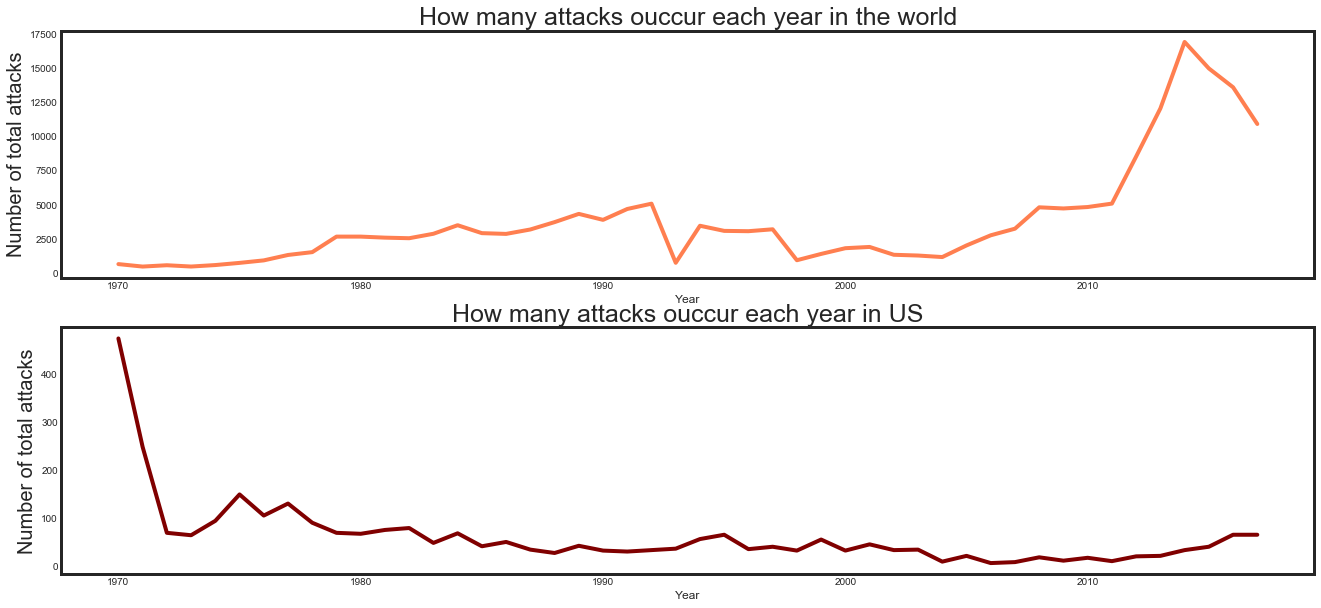

In [18]:
#create 2 subplots for the trend of the world and the U.S.
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(attack_world.index,attack_world.values, color="coral",ax=ax[0])
#the world trend
ax[0].set_xlabel('Year',fontsize = 12)
ax[0].set_ylabel('Number of total attacks', fontsize = 20)
ax[0].set_title('How many attacks ouccur each year in the world',fontsize= 25) 
sns.lineplot(attack_year["iyear"],attack_year['attacktype_count'], color="maroon",ax=ax[1])
#the U.S. trend
ax[1].set_xlabel('Year',fontsize = 12)
ax[1].set_ylabel('Number of total attacks', fontsize = 20)
ax[1].set_title('How many attacks ouccur each year in US',fontsize= 25) 


* The first plot shows us the time trend of the terrorist attacks is fluactuate.
* The past decade have seen a radical increasing in the number of terrorist activities, the peak of which is 16903 in 2014.
* Overall, the frequency of attacks is going up.
* Today's terrorist landscape is more fluid and complex than ever.
* Compare to the global trend, the total number of terrorist attack in U.S. has declined since 1970s.
* Although in recent years the terrorist attacks regain the upward tendency, the U.S. federal officials have made impressive progress on the couterterrorism.



###### Is this a high time to lower the guard down? Let us keep going and looking at the casualties .

#### b. Comparing the casualties caused by terrorist attack of U.S. and the rest of world <a id='cau_us'></a>

Text(0.5, 1.0, 'Comparing total killed and wounded in the US and the rest of world')

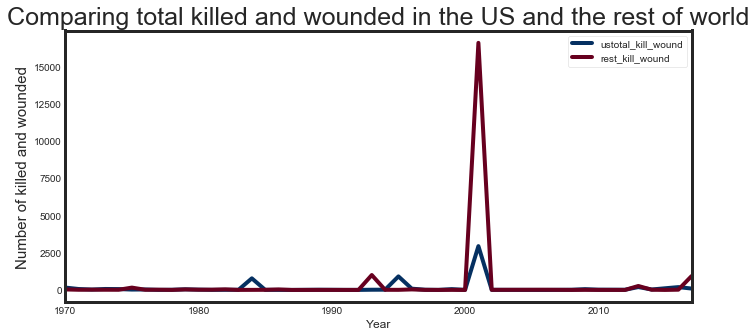

In [36]:
#plot the lineplot to compare the us casualty and that of the rest of the world
us_clt_time=df_us.groupby('iyear')[['total_kill_wound','ustotal_kill_wound']].sum()
us_clt_time['rest_kill_wound']=us_clt_time['total_kill_wound']-us_clt_time['ustotal_kill_wound']
us_clt_time=us_clt_time[us_clt_time.iloc[:,0]>0][us_clt_time.iloc[:,1]!=0]
sns.set_style('white')
ax = us_clt_time.iloc[:,[1,2]].plot(figsize = (10,5),colormap="RdBu_r")
plt.legend()
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Number of killed and wounded', fontsize = 15)
plt.title('Comparing total killed and wounded in the US and the rest of world',fontsize= 25)

* The trend of casualty in both U.S. and the whole world are similar.
* There are several attacks with huge casualties before the september 11 attack, but not after that, and that may due to the enhancement of the homeland security measurement. 
* The casualties caused by terrorist attack for the world are going up in recent years.

#### c. Time trend of attack frequency among areas with different income levels<a id='gdp_us'></a>

In [190]:
#filter 3 columns to create the plot
gdp_att=df_all.loc[:,['iyear','city','GDP']].dropna()
#cut the GDP bins and assign to new columns
gdp_att['GDPbin']=pd.qcut(gdp_att['GDP'], [0., 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.],
                          labels=["1-(82.1M,2.3B]","2-(2.3B,6.6B]","3-(6.6B,33.6B])","4-(33.6B,192.6B]","5-(192.6B,770B]"
                                  ,"6-(770.1B,1834.4B]","7-(1834.4B,6896B]","8-(6896B:19390.6B]"]).astype(str)
#cut the year bins and assign to new columns
bins = np.linspace(start=1969, stop=2017, num=7)
gdp_att['Year Bin'] = pd.cut(gdp_att['iyear'], bins)
#Using groupby to calculate the attack frequency in each GDP bins
gdpyear=pd.DataFrame(gdp_att.groupby(['GDPbin','Year Bin']).city.count().dropna().reset_index())

Text(0.5, 1.0, 'The Time Trend of Attack Frequency among Different GDP Bins ')

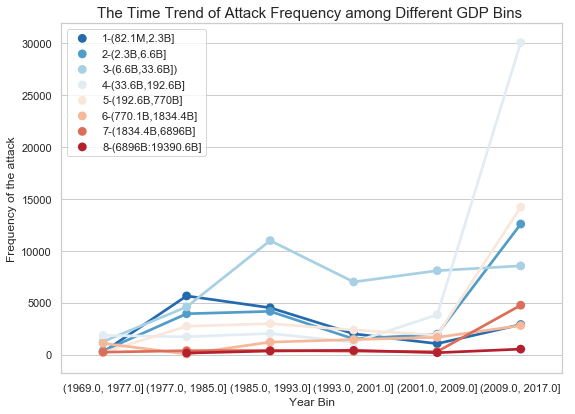

In [197]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Year Bin', y='city', hue='GDPbin', ci=None, palette="RdBu_r", data=gdpyear).legend(loc='upper left', frameon=True)
plt.ylabel('Frequency of the attack')
plt.title('The Time Trend of Attack Frequency among Different GDP Bins ',fontsize=15)

*  Overall,the high income areas have less terrorist attack, and it is very likely because they can invest more on the homeland security and cutting edge military technologies.
* Also,as shown in the plot,higher income areas have more smooth trend therefore they could maintain a stable security status.
* Recent years the frequency of the terrorist attack is going up even for the richest areas.
* The U.S. still need to stay alert with the potential threats.

#### d. Exploring the distribution of the terroist attacks causing 10 or more death of u.s. citizen. <a id='us_citizen'></a>

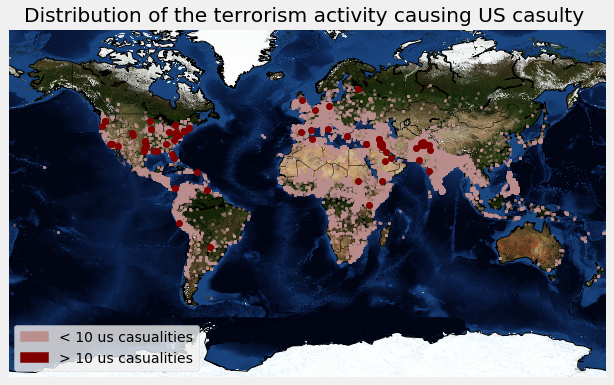

In [130]:
map_us_cal= Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
map_us_cal.bluemarble()
lat_=list(df_all[df_all['ustotal_kill_wound']<=10].latitude)
long_=list(df_all[df_all['ustotal_kill_wound']<=10].longitude)
x_,y_=map_us_cal(long_,lat_)
map_us_cal.plot(x_, y_,'go',markersize=2,color ='rosybrown',alpha=0.4)
lat_10=list(df_all[df_all['ustotal_kill_wound']>10].latitude)
long_10=list(df_all[df_all['ustotal_kill_wound']>10].longitude)
x_10,y_10=map_us_cal(long_10,lat_10)
map_us_cal.plot(x_10, y_10,'go',markersize=6,color = 'maroon')
map_us_cal.drawcoastlines()
map_us_cal.drawcountries()
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Distribution of the terrorism activity causing US casulty ')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='rosybrown', label = "< 10 us casualities"),
                    mpatches.Patch(color='maroon',label='> 10 us casualities')])
plt.show()


* The terrorist attacks with more than 10 or more death of U.S. citizens are mainly concentrate in the U.S. territory, the U.S. government should continue to strengthen the screening capabilities and counterterrorism measurement in homeland.

### 2.Digging deeper into the domestic terrorist attack and analyzing the geographical distribution and feature.

#### a. Overviewing the geographical distribution of the catastrophic terrorist attacks(casualty>50). <a id='state_us'></a>


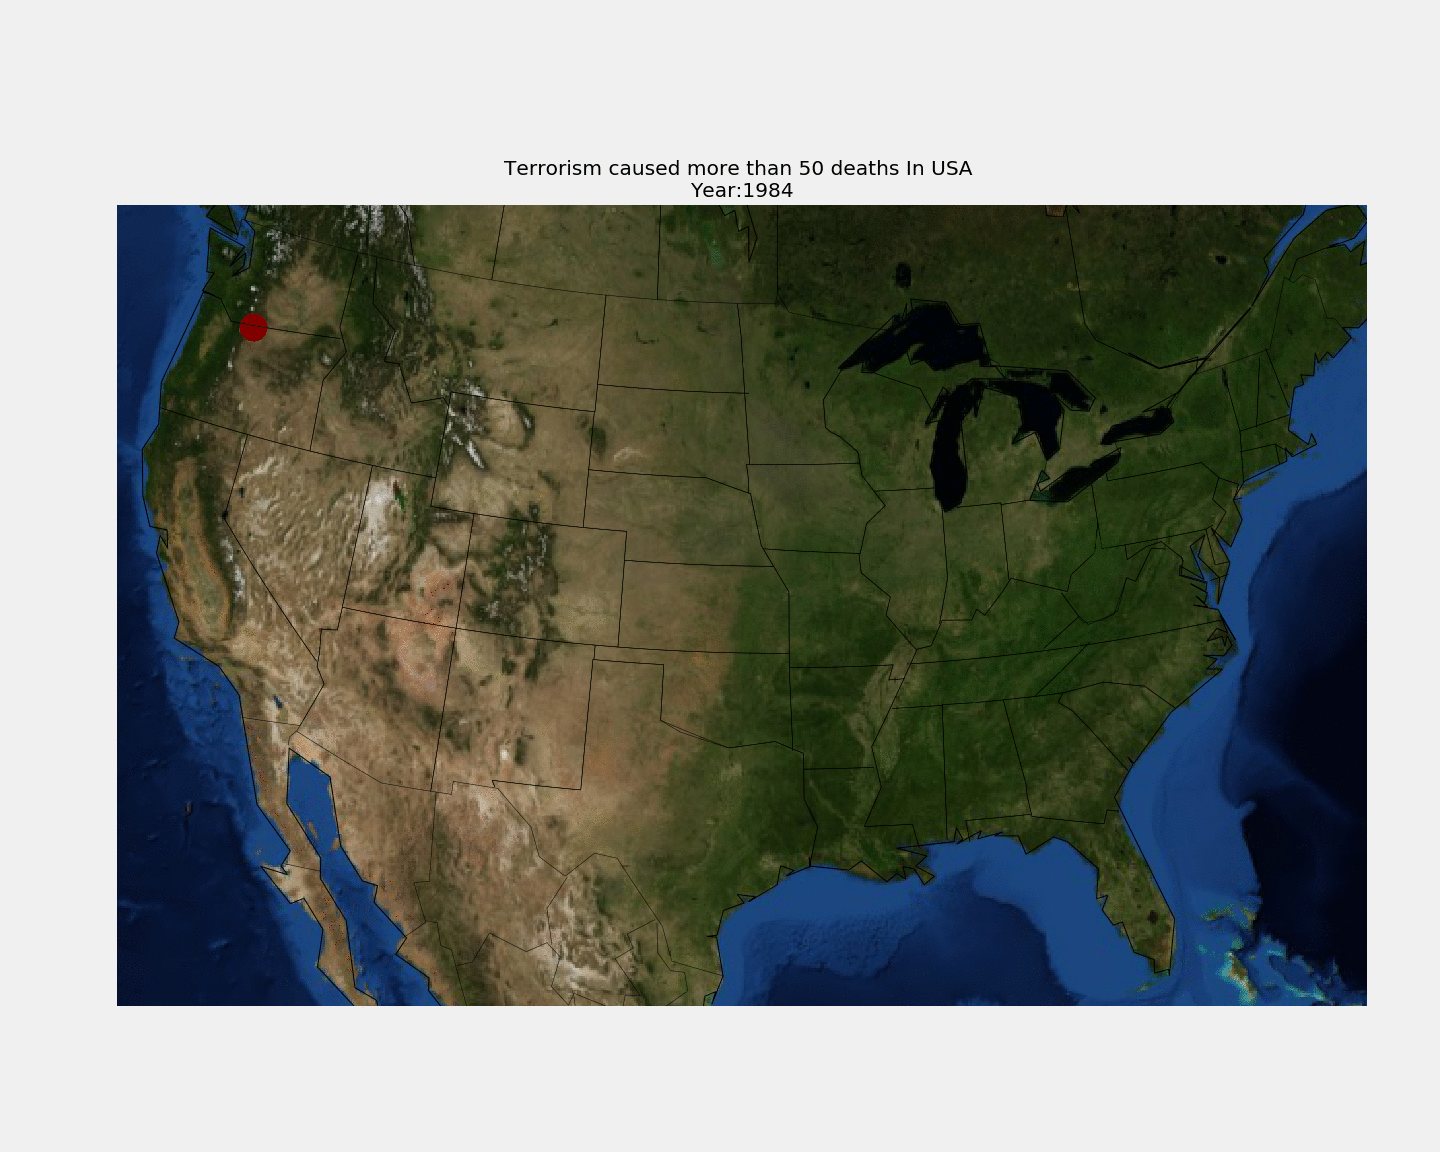

In [18]:
df_us_50=df_all[df_all['country_txt']=='United States'][df_all['ustotal_kill_wound']>50]
fig = plt.figure(figsize = (20,16))
def animate(iyear):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism caused more than 50 deaths In USA '+'\n'+'Year:' +str(iyear))
    m_us = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    lat_gif1=list(df_us_50[df_us_50['iyear']==iyear].latitude)
    long_gif1=list(df_us_50[df_us_50['iyear']==iyear].longitude)
    x_gif1,y_gif1=m_us(long_gif1,lat_gif1)
    m_us.scatter(x_gif1, y_gif1,s=[total_kill_wound for total_kill_wound in df_us_50[df_us_50['iyear']==iyear].ustotal_kill_wound],color ='maroon') 
    m_us.drawcoastlines()
    m_us.drawcountries()
    m_us.drawstates()
    m_us.bluemarble()
ani = animation.FuncAnimation(fig,animate,list(df_us_50.iyear.unique()), interval = 2500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

From this gif, we can recognize several shocking attacks(there is no need to mention the September 11 again),such as:
* the bioterror attack of food poisoning that caused 751 deaths in The Dalles, Oregon
* the Oklahoma City bombing in 1995
* the mass shooting in Florida just happend in 2016
Most of them happen in the border area of the U.S., so continue to make the efforts to protect the nation’s borders is still on the top priority.

###### After the overlook, we can focus on the more specific range, the states.

#### b. Ranking the state by the attack frequency and caused causualties. <a id='state_att'></a>

In [17]:
us_inci=df_us[df_us['country_txt']=='United States'].groupby('provstate')[['nkillus','nwoundus','ustotal_kill_wound']].sum().reset_index().sort_values('ustotal_kill_wound',ascending=False)
us_stateCount = df_us['provstate'].value_counts().reset_index().rename({'provstate' : 'state_count'}, axis = 1)
us_state_attacks = pd.merge(left = us_inci, right = us_stateCount, left_on = 'provstate', right_on = 'index').drop('index', axis = 1)

In [18]:
us_state_attacks.sort_values('state_count', ascending = False).head()

provstate  nkillus  nwoundus  ustotal_kill_wound  state_count
5    California     70.0     111.0               181.0          605
0      New York   2714.0     139.0              2853.0          517
14  Puerto Rico     11.0      30.0                41.0          248
6       Florida     56.0      62.0               118.0          161
16     Illinois      6.0      33.0                39.0          119

In [9]:
#changing the width of barplot with hue
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

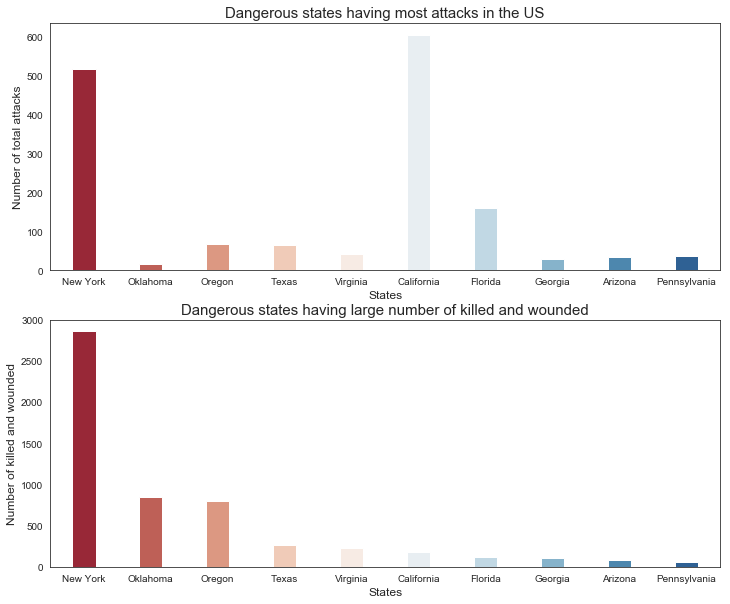

In [10]:
top10_us_state_attack = us_state_attacks.iloc[:10]
#Compare top5 terror groups which attacks the most to top5 terror groups causes the most number of killed and wounded
fig, ax = plt.subplots(2, 1, figsize=(12,10))
#top5 terror groups which attacks the most
sns.barplot(x = "provstate",y = "state_count", data = top10_us_state_attack, palette = "RdBu", ax=ax[0])
ax[0].set_xlabel('States', fontsize = 12)
ax[0].set_ylabel('Number of total attacks', fontsize = 12)
ax[0].set_title("Dangerous states having most attacks in the US",fontsize= 15)
change_width(ax[0], .35)
#top5 terror groups causes the most number of killed and wounded
sns.barplot(x = 'provstate',y = 'ustotal_kill_wound', data = top10_us_state_attack, palette = "RdBu", ax=ax[1])
ax[1].set_xlabel("States", fontsize = 12)
ax[1].set_ylabel("Number of killed and wounded", fontsize = 12)
ax[1].set_title("Dangerous states having large number of killed and wounded",fontsize= 15)
change_width(ax[1], .35)
# Adjust subplot
#plt.tight_layout()

* As we can see California had a lot of attacks over the years, but the number of casualties are relatively small.<br>
* This indicates that the main goal of attacks might not be killing people, it might be having some kind of protests. <br>
* On the contrary, New York state had a large number of attacks and casualties over the year. <br>
From the map we've showned before, 9/11 was the the main reason that cause the high number of killed and wounded in New York, apart from that, New York state is still on high alert.

###### After the geographical  analysis, next we will heading to the part about the terrorist groups, and that is essential for the deployment of the counterterrorism since each terrorist group has its own signiture, analysing and learning into them would of great help to identify their activity in the early stage and hopefully prevent the attack in the early stage.

### 3. Analysis the evolution and preference of the terrorist goups cause the most casualties in U.S <a id='5_gname'></a>

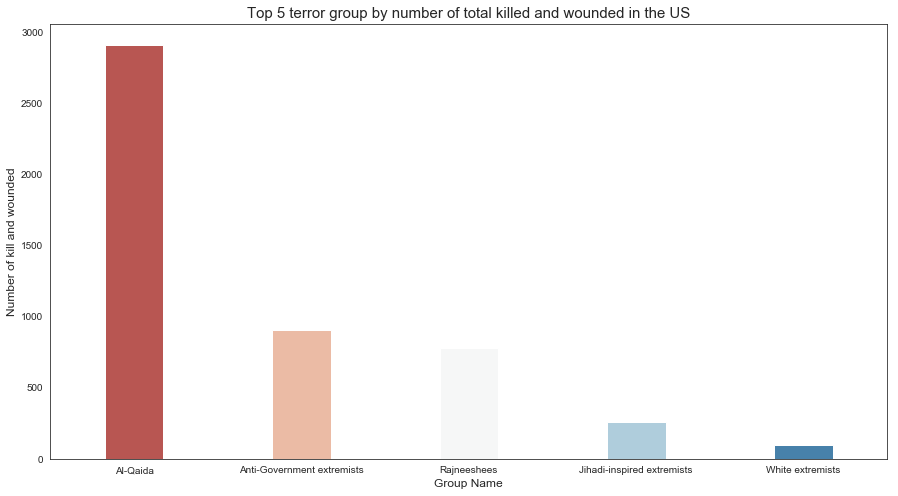

In [19]:
# The top5 most popular terror groups in US 
gname_kill = df_us.groupby(df_us[df_us['gname'] != 'Unknown']['gname'])['nkillus','nwoundus','ustotal_kill_wound'].sum().sort_values(by = 'ustotal_kill_wound', ascending = False).reset_index()
top_5_gname_kill = gname_kill.iloc[:5]
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'gname',y = 'ustotal_kill_wound', data = top_5_gname_kill,palette = "RdBu")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Group Name", fontsize = 12)
plt.ylabel("Number of kill and wounded", fontsize = 12)
plt.title("Top 5 terror group by number of total killed and wounded in the US",fontsize= 15)
change_width(ax, .35)
plt.show()

* This 5 groups with the highest number of victims should be colsely screened.
* The first one is AL-Qaida,which caused the most casualties since they planed and lauched the shocking september 11 event.

#### a. Evolving trend of the top 5 notorious groups. <a id='gname_trend'></a>

In [137]:
#group the df_ngroup_top5 by the year
df_ngroup_iyear=df_ngroup_top5.groupby(['iyear','gname']).city.count()

In [137]:
#group the df_ngroup_top5 by the year
df_ngroup_iyear=df_ngroup_top5.groupby(['iyear','gname']).city.count()

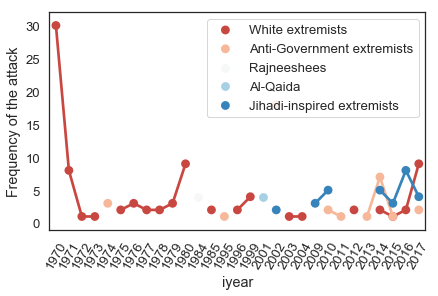

In [195]:
sns.pointplot(x='iyear', y='city', hue='gname', ci=None, palette='RdBu', data=df_ngroup_iyear).legend(loc='upper right', frameon=True)
sns.set_style('white')
plt.ylabel('Frequency of the attack')
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
for txt in fig.texts:
    txt.set_visible(False)

* The Al- Qaida and the Rajneeshees are both lauched attack in one certain year before 2000, these 2 groups are inactive in recent years.
* The White extrimists, Anti-Government extremists and Jihadi-Inspired extremists are the 3 activest group,so screening their avtivities and learn into these groups is crucial for preventing the threats.
* The White extrimists is lauching the most attacks among those 3 and also evolving more and more rapidly, so next we will look closely at their signiture in attacks.

#### b.What are the signitures in the attacks of the most nostorious terrorist group?(taking the white extremist as a example) <a id='gname_type'></a>

In [48]:
#filter the df_us and  save a new dataframe with 5 terrorist group causing the most casulty
df_ngroup_top5=df_us[df_us['gname'].isin(['Al-Qaida', 'Anti-Government extremists', 'Rajneeshees', 'Jihadi-inspired extremists', 'White extremists'])]

In [51]:
#create a new dataframe by filtering the df_ngroup_top5 with the commonest target type
gname_targ=df_ngroup_top5[df_ngroup_top5['targtype1_txt'].isin(['Private Citizens & Property', 'Government (General)',
                                                                'Business','Military', 'Educational Institution', 'Police'])]
#create a new dataframe by filtering the df_ngroup_top5 with the commonest attack type
gname_attack=df_ngroup_top5[df_ngroup_top5['attacktype1_txt'].isin(['Hijacking', 'Bombing/Explosion','Unarmed Assault',
                                                                    'Armed Assault','Facility/Infrastructure Attack', 'Hostage Taking (Barricade Incident)'])]
#create a new dataframe by filtering the df_ngroup_top5 with the commonest weapon type
gname_weap=df_ngroup_top5[df_ngroup_top5['weaptype1_txt'].isin(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Explosives',
                                                                'Incendiary','Biological', 'Firearms', 'Sabotage Equipment', 'Melee'])]
#change the name of the weapon "Vehicle"
gname_weap['weaptype1_txt'][gname_weap['weaptype1_txt']=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']='Vehicle'

In [52]:
#make pivot table using the target types and groups and count the frequency 
gn_targ_piv=pd.pivot_table(gname_targ,values='ustotal_kill_wound',index='targtype1_txt',columns='gname',aggfunc=np.count_nonzero,fill_value=0)
#make pivot table using the attack types and groups and count the frequency 
gn_attack_piv=pd.pivot_table(gname_attack,values='ustotal_kill_wound',index='attacktype1_txt',columns='gname',aggfunc=np.count_nonzero,fill_value=0)
#make pivot table using the weapon types and groups and count the frequency 
gn_weap_piv=pd.pivot_table(gname_weap,values='ustotal_kill_wound',index='weaptype1_txt',columns='gname',aggfunc=np.count_nonzero,fill_value=0)

Text(0.5, 1.0, 'Commonest Weapon Type of the top 5 Notorious Terrorist Group')

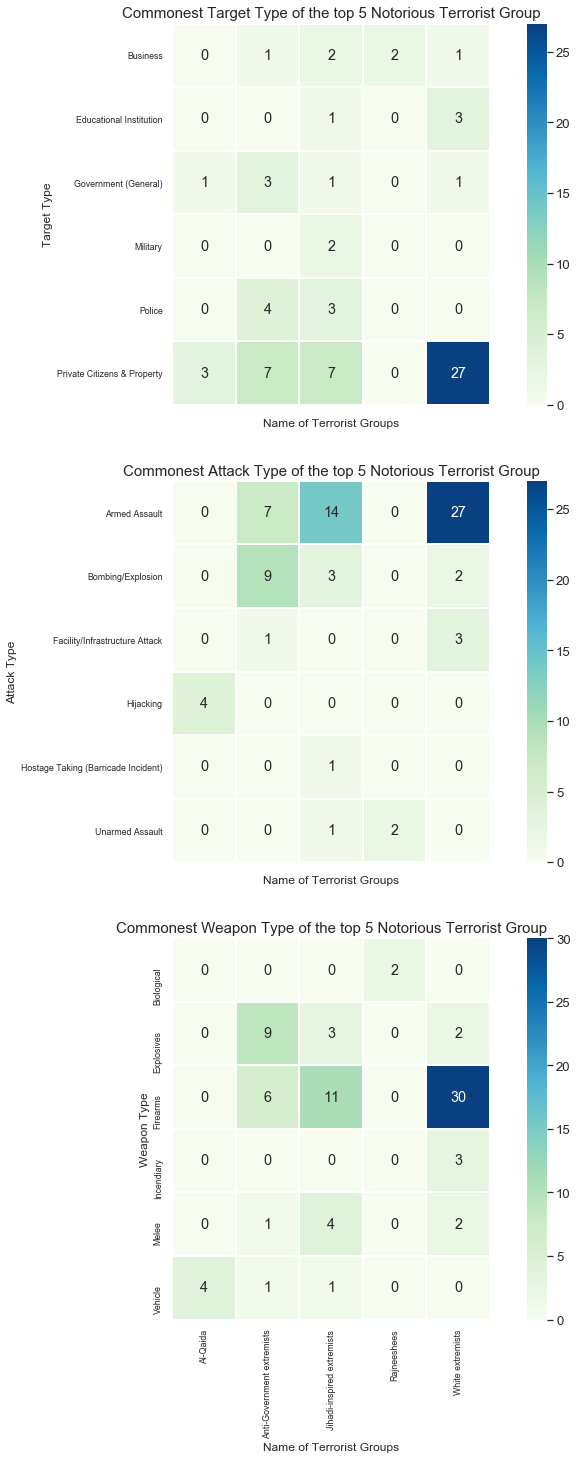

In [111]:
#create 2 subplots for the trend of the world and the U.S.
fig, ax = plt.subplots(3,1, figsize=(12,6))
plt.subplots_adjust(top=15,bottom=12)
sns.set(font_scale = 1.2)
sns.heatmap(gn_targ_piv, cmap="GnBu", annot=True, fmt='d', square=True, linewidths=1,ax=ax[0])
ax[0].set_ylabel('Target Type', fontsize = 12)
ax[0].set_xlabel('Name of Terrorist Groups', fontsize = 12)
ax[0].set_title('Commonest Target Type of the top 5 Notorious Terrorist Group',fontsize= 15) 
ax[0].xaxis.set_major_formatter(plt.NullFormatter())
sns.heatmap(gn_attack_piv, cmap="GnBu", annot=True, fmt='d', square=True, linewidths=1,ax=ax[1])
ax[1].set_ylabel('Attack Type',fontsize = 12)
ax[1].set_xlabel('Name of Terrorist Groups', fontsize = 12)
ax[1].set_title('Commonest Attack Type of the top 5 Notorious Terrorist Group',fontsize= 15) 
ax[1].xaxis.set_major_formatter(plt.NullFormatter())
sns.heatmap(gn_weap_piv, cmap="GnBu", annot=True, fmt='d', square=True, linewidths=1,ax=ax[2])
ax[2].set_ylabel('Weapon Type',fontsize = 12)
ax[2].set_xlabel('Name of Terrorist Groups', fontsize = 12)
ax[2].set_title('Commonest Weapon Type of the top 5 Notorious Terrorist Group',fontsize= 15) 

From the heat map, we could learn that:
* White extremists target most on the civilian, which is a pretty vulnerable group, that means they don't withhold grudge for any specific institution.
* Their favourite attack type is armed assault, which has a nature of displaying and causing panic.
* Consisting with the attack type, their favourite weapon is firearms, which not very powerful but enough to control limited number of people.
* Comparing with the Al-Qaida or Rajneeshees, they carry our more attacks but with less distructive power, since attacks like September 11 needs plenty of efforts, carriers and financial supporting, those attacks always lead to a large and organised group and deep hatred,and that maybe indicts the white extremist is a small but evolving group. 
* We can also make assumpiton that this group is more about displaying and make protests.

###### We have already talked a little about the motivation, so let's move on for the commonest theme in the motivation of terrorist attacks.

### 4. What are the terroist motivation? <a id='motivation'></a>

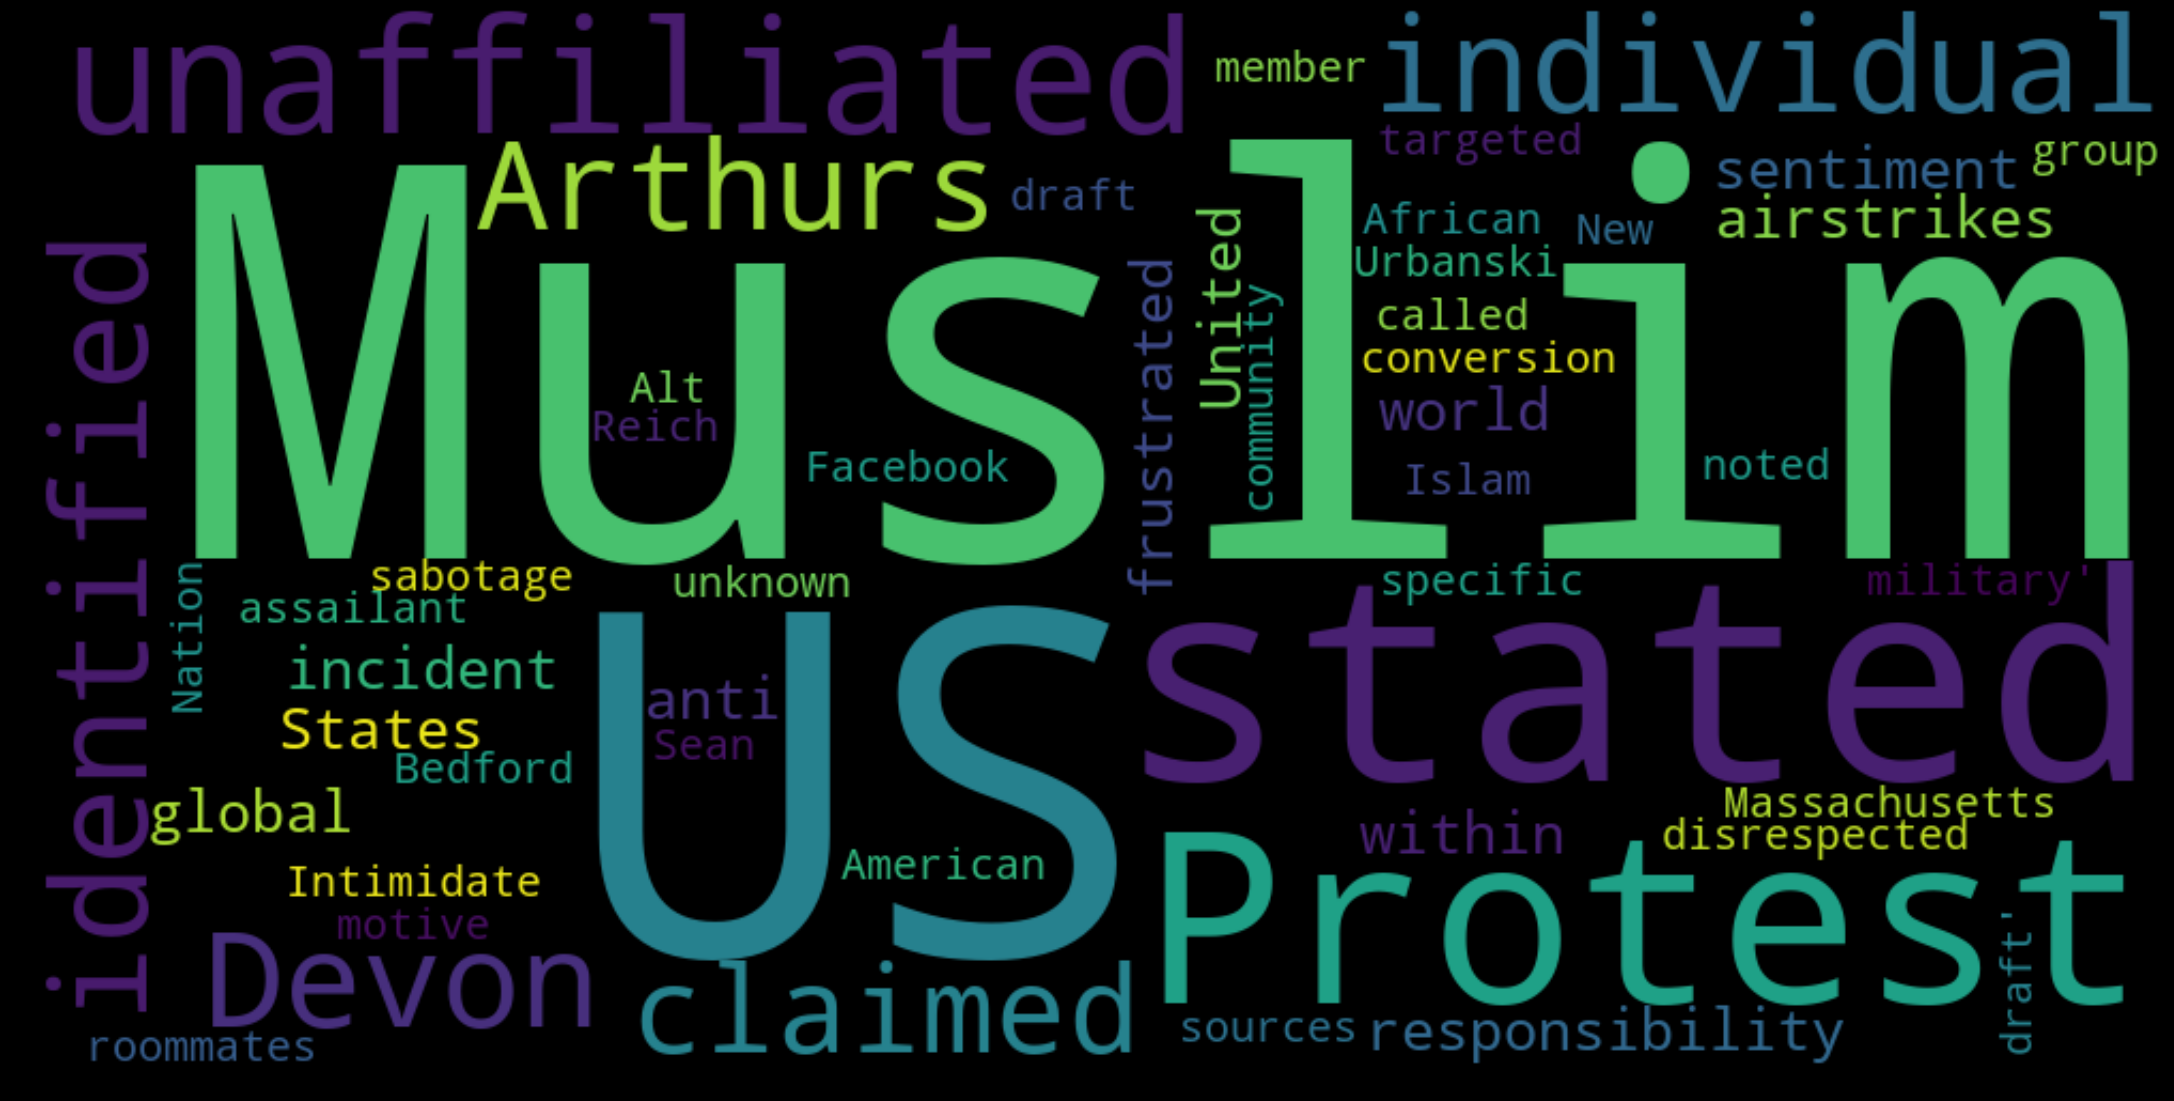

In [12]:
#Create a wordcloud of the terror attacks motive
from wordcloud import WordCloud
df_us_motive = df_us['motive'].dropna()
text = df_us_motive.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black').generate(str(text))

fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* We can see 'Muslim' and 'Protest' are the important keyword here, this can give us more clues on how the attacks were formed.
* Also the prostate, stated and claimed are all high frequency words, meaning most of the terrorist groups are lauching those attacks for attention and protesting.

###### So far we have talked about the threats with some known groups, but what if the incoming threats involves unkown perpetrator?
- By building a predictive model!

## Prediction Model <a id='model'></a>

Building models which could predict whether a certain terrorist attack would be success and make inference of the main attributors lead to the success, to enhance the ability dealing with threats involving unknown perpetrators, methods, and targets.

### 1.Data Wrangling <a id='wraggling'></a>

In [6]:
#Relevel weaptype1_txt.
df['weaptype1_txt']= np.where(df['weaptype1_txt'] == 'Explosives', 'Explosives', 
         np.where(df['weaptype1_txt'] == 'Incendiary', 'Incendiary', 
                  np.where(df['weaptype1_txt'] == 'Firearms', 'Firearms', 'Other')))

In [7]:
#Relevel targtype1_txt
df['targtype1_txt']= np.where(df['targtype1_txt'] == 'Business', 'Business', 
         np.where(df['targtype1_txt'] == 'Private Citizens & Property', 'Private Citizens & Property', 
                  np.where(df['targtype1_txt'] == 'Government (General)', 'Government (General)', 
                           np.where(df['targtype1_txt'] == 'Abortion Related', 'Abortion Related',
                                   np.where(df['targtype1_txt'] == 'Military', 'Military',
                                           np.where(df['targtype1_txt'] == 'Police', 'Police',
                                                   np.where(df['targtype1_txt'] == 'Educational Institution', 'Educational Institution',
                                                           np.where(df['targtype1_txt'] == 'Religious Figures/Institutions', 'Religious Figures/Institutions',
                                                                   np.where(df['targtype1_txt'] == 'Government (Diplomatic)', 'Government (Diplomatic)', 'Other')))))))))

In [9]:
#Drop columns with more than 80%.
df1 = df.dropna(thresh=df.shape[0]*0.8,how='all',axis=1)

In [10]:
#Drop rows where GDP is null.
df1 = df1[df1['GDP'].notnull()]

In [11]:
#Drop rows where success is null.
df1 = df1[df1['success'].notnull()]

In [12]:
#Change 'success' type to int.
df1['success'] = df1['success'].astype(int)

In [13]:
#Copy a new dataframe df1_nn.
df1_nn = df1

In [100]:
#Select only numeric variables.
df1_nn = df_us.select_dtypes([np.number])

In [109]:
#Subset categorical variables want to put in the model.
df1_str = df_us[['attacktype', 'weapontype', 'targettype']]

In [112]:
#Create dummy variables.
#Base: attack -> Armed Assault, weapon -> Explosive, target -> Business
df1_str = pd.concat([df1_str['attacktype'].str.get_dummies(sep='|'), df1_str['weapontype'].str.get_dummies(sep='|'), df1_str['targettype'].str.get_dummies(sep='|')], axis = 1)

In [113]:
#Convert dummy variables to numeric.
df1_str = df1_str.apply(pd.to_numeric)

In [117]:
#Combine dummy variables with numeric variables.
df1_nn = pd.concat([df1_nn, df1_str], axis = 1)

### 2. Sklearn model <a id='sklearn'></a>

In [22]:
success = df1_nn['success']
df1_nn.drop(labels=['eventid','success'], axis=1,inplace = True)
df1_nn.insert(0, 'success', success)

In [221]:
xy = df1_nn.iloc[:, [0] + list(range(7, 16)) + [17,18] + list(range(20, 32, 2)) + [31] + list(range(34,36)) + list(range(42,45)) + list(range(46,203))]

In [222]:
xy = xy.dropna()

In [223]:
y = xy.iloc[:,0]
X = xy.iloc[:,1:]

In [224]:
#Deal with imbalance data.
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['success'])
# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of not success in oversampled data",len(os_data_y[os_data_y['success']==0]))
print("Number of success",len(os_data_y[os_data_y['success']==1]))
print("Proportion of not success data in oversampled data is ",len(os_data_y[os_data_y['success']==0])/len(os_data_X))
print("Proportion of success data in oversampled data is ",len(os_data_y[os_data_y['success']==1])/len(os_data_X))

Length of oversampled data is  2674
Number of not success in oversampled data 1337
Number of success 1337
Proportion of not success data in oversampled data is  0.5
Proportion of success data in oversampled data is  0.5


First, the data is imbalanced (too many success than not success). SMOTE packages provide function to deal with imbalanced data. After oversampling and some process, we can get balanced data.

#### a. RFE <a id='rfe'></a>

In [248]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter = 10000)
rfe = RFE(logreg, 50)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False False False False  True False
 False False False False False False False False  True False  True  True
  True False False False  True  True  True  True  True False False  True
 False False False False False False False False False False False False
  True  True False  True  True False False False False False False False
  True False  True False False False  True  True False False False False
 False False False  True False False False False False False False False
 False False  True  True False False  True False  True False False False
 False False False False False False  True  True  True  True False False
  True  True False False False  True  True  True  True False False False
 False False False  True False False  True False False  True False False
 False False False False False  True False False  True False  True False
 False False False False False  True False  True False False  True False
 False False  True False False False  True False Fa

In [249]:
X.columns[rfe.support_]

Index(['crit1', 'crit2', 'ransom', 'total_kill_wound', 'pertotal_kill_wound',
       'Armed Assault', 'Assassination', 'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown',
       'Arson/Fire', 'Blunt Object', 'Letter Bomb', 'Melee', 'Other',
       'Other Explosive Type', 'Rifle/Shotgun (non-automatic)',
       'Sabotage Equipment', 'Time Fuse', 'Unknown',
       'Aircraft (not at an airport)', 'Construction',
       'Diplomatic Personnel (outside of embassy, consulate)', 'Electricity',
       'Entertainment/Cultural/Stadium/Casino', 'Head of State',
       'Hotel/Resort', 'House/Apartment/Residence',
       'Industrial/Textiles/Factory',
       'International Organization (peacekeeper, aid agency, compound)',
       'Journalists & Media', 'Maritime', 'Marketplace/Plaza/Square',
       'Medical/Pharmaceutical', 'Memorial/Cemetery/Monument',
       'Military Transportation/Vehicle (excluding convoys)',
       'Museum/Cultural Center/

Second, we can start to build our logistic regression model. Then, we can use RFE algorithm to see what variables are selected/ ranked (The variables are shown above.).

#### b. Prediction <a id='prediction'></a>

In [226]:
#Baseline
y_test.mean()

0.8103130755064457

The baseline accuracy is 81.031%. We have to make sure the accuracy predicted by our model beats the baseline accuracy, if not, the model will be useless.

In [245]:
logreg.fit(X_train, np.ravel(y_train))
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83057


In [228]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 18  85]
 [  7 433]]


#### c. ROC curve <a id='roc'></a>

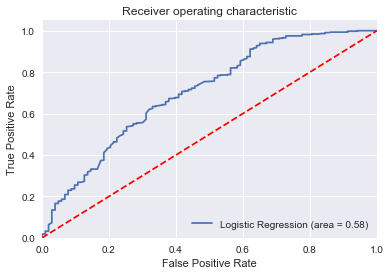

In [229]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The accuracy is 83.057%, which is higher than the baseline accuracy. The ROC curve is also above the diagonal, which means that the AUC is over 0.5. These measures show that the model is useful, but there is still room for improvement.

#### d. Coefficient <a id='coef'></a>

In [230]:
X = xy.iloc[:,1:]

In [231]:
logreg_coef = pd.DataFrame(np.vstack((np.array(X.columns), logreg.coef_[0]))).T

In [232]:
logreg_coef.columns = ['Var', 'Coef']

In [233]:
logreg_coef

Var         Coef
0                                          specificity    0.0171795
1                                             vicinity    -0.166222
2                                                crit1     -0.40468
3                                                crit2     0.792242
4                                                crit3    0.0267048
5                                             multiple    0.0406496
6                                              suicide    0.0360033
7                                          guncertain1   -0.0950242
8                                           individual       0.4609
9                                            ishostkid     0.236401
10                                              ransom     0.568988
11                                    attacktype_count    -0.876541
12                                      targtype_count     -0.50982
13                                   targsubtype_count   -0.0121371
14                                        target_count    0.0968171
15                                          corp_count    -0.154725
16                                         group_count    -0.360511
17                                         total_claim     0.103312
18                                      weaptype_count    0.0970925
19                                   weapsubtype_count     0.450387
20                                    total_kill_wound      0.44405
21                                  ustotal_kill_wound     0.406086
22                                 pertotal_kill_wound     -1.64623
23                                       Armed Assault     0.621516
24                                       Assassination     -1.21279
25                                   Bombing/Explosion    -0.255251
26                      Facility/Infrastructure Attack     0.556142
27                                           Hijacking    -0.153721
28                 Hostage Taking (Barricade Incident)      1.16494
29                         Hostage Taking (Kidnapping)     0.370699
..                                                 ...          ...
150                                          Protester     0.121802
151  Public Area (garden, parking lot, garage, beac...      0.78576
152                          Race/Ethnicity Identified     0.251626
153                                              Radio      0.25068
154                    Radio Journalist/Staff/Facility     0.559772
155                                Religion Identified     0.159994
156                                   Religious Figure   -0.0683818
157                     Religious Figures/Institutions    -0.106013
158                                Restaurant/Bar/Café     0.942269
159                              Retail/Grocery/Bakery    0.0354122
160             School/University/Educational Building     0.272563
161                                            Student      0.16983
162                       Teacher/Professor/Instructor    -0.765234
163                                  Telecommunication    -0.407826
164                                Telephone/Telegraph    -0.391373
165               Television Journalist/Staff/Facility     0.572963
166                                          Terrorist    -0.181941
167                       Terrorists/Non-State Militia   0.00762932
168                              Tourism Travel Agency     0.343613
169                                            Tourist  0.000898616
170                                           Tourists      0.51034
171                         Train/Train Tracks/Trolley    -0.322198
172                                     Transportation     -0.30031
173                                            Unknown    -0.198083
174                       Unnamed Civilian/Unspecified    -0.585696
175                                          Utilities     0.333367
176                            Vehicles/Transportation     0.176941
177                           Village/C

The coefficients of all the variables are shown above. We can easily see the relationship of each variables with success. Positive means if the variable's value increase, the probability of success will increase. In contrast, negative means if the variable's value decrease, the probability of success will decrease.

The predictive model will help the US government to predict whether the terror attack will success or not by knowing the features of the attack.

###  3. Logit model <a id='logit'></a>

In [45]:
xy2 = df1_nn.iloc[:, [0] + list(range(10, 17)) + [34,36,38,40,42,44,45,46,47,48] + list(range(50, 70))]

In [46]:
xy2 = xy2.dropna()

In [47]:
X2 = xy2.iloc[:,1:]
y2 = xy2.iloc[:,0]

In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y2,X2)

In [49]:
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.410899
         Iterations: 35
                                   Results: Logit
Model:                      Logit                  No. Iterations:         35.0000  
Dependent Variable:         success                Pseudo R-squared:       0.111    
Date:                       2019-05-08 20:44       AIC:                    2433.3849
No. Observations:           2871                   BIC:                    2653.9943
Df Model:                   36                     Log-Likelihood:         -1179.7  
Df Residuals:               2834                   LL-Null:                -1327.6  
Converged:                  0.0000                 Scale:                  1.0000   
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------
vicinity                          

/Users/Howard/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Logistic regression model built by sklearn doesn't have much statistical inference power. So we use the Logit function from statsmodel.api package to run a similar model. Then we can get other statistical information like p-value or others. The coefficient might be different because of different algorithm.

To be specific, due to the logistic regression model, we can see that among all types of target, terrorist attack to business has the highest success rate; kidnapping has the highest success rate among all types of attack and attacks that meet criterion 2(which are intention to coerce, intimate or publicize to larger audiences) will leads to best success. For the variables that has negative relationship with success rate, attack type of assassination and unarmed assault are the least successful terror attack. These shows us the relationship and factors that lead to successful attack, and because of the accuracy and AUC, we are confident about the result and the information the model tells us.

## Conclusion <a id='conclusion'></a>

Due to our analysis, we know that the number of terrorist attacks was increasing for the last 4 decades. In contrast, United States did a great job on prevention from terrorism, the number of attacks was constantly low after the 70s. Though comparing to the whole world the number of attacks isn't that large, we still hear many terrifying incidents on news, that's why we continue dig into the insight of those attacks in the United States. First, besides the U.S. territory, there are lots of American died from terrorist attacks in middle east and Europe. The casualty may result from the intensive relationship between U.S. and middle east. 

Inside the U.S. territory, the most dangerous states in U.S. are mostly the modern states on east and west coast, and also the southernmost states that are near the border. We found that most attacks in the United States didn't result in a large amount of killed and wounded, it's because the goals for most of the attacks in U.S. is for protesting. In addition to protesting, we found the most active terrorism groups that is most dangerous to U.S and their most favorite weapons, target and attack types. Unsurprisingly, Al-Qaida kills the most among the top 5 terrorism group due to 911.

We want to prevent the terrorist attacks, or reduce their success rate. Therefore, the predictive model we made can help us understand which factors will lead the attack to success or not. The government can try to eliminate those important factors of a successful terrorist attack to increase our security.
To secure U.S. from terrorism, to avoid tragedy, we have to gain more knowledge of those attack. Our analysis and report provide information and insight of terrorism, and the model also helps us understand the relationship of different factors with success. Therefore, combining those information, we might be able to prevent next terrorist attack in the future!

